In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from scipy.stats import skew

from sklearn.preprocessing import LabelEncoder,StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score,classification_report,confusion_matrix

from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor

### reading data from csv file

In [2]:
df=pd.read_csv("Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.shape # rows=10000 , columns=14

(10000, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


### checking whether features have outlier or not.

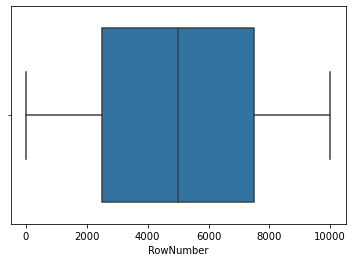

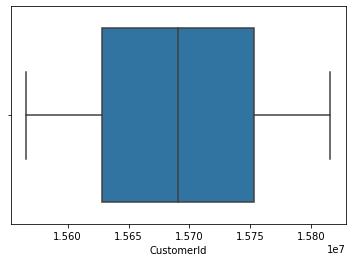

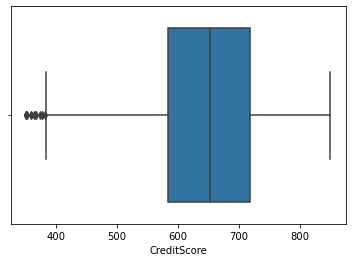

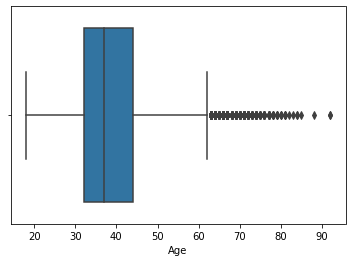

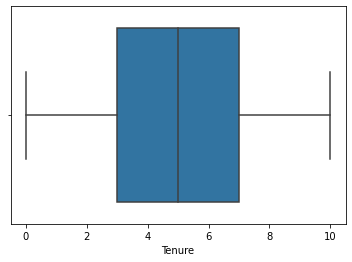

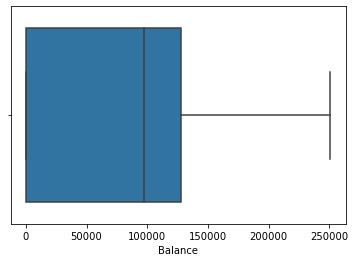

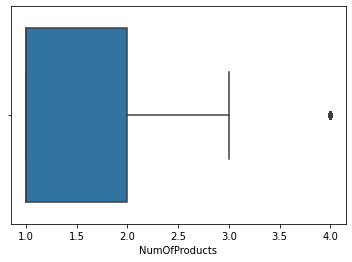

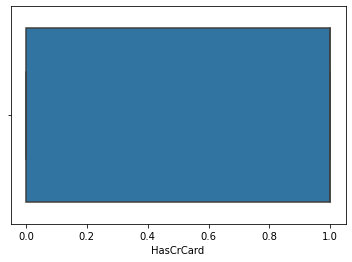

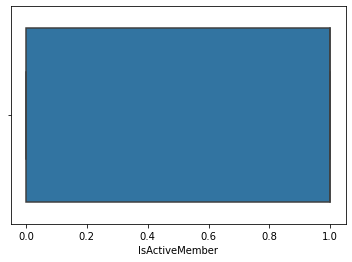

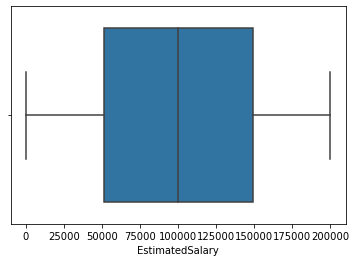

In [6]:
columns=df.drop(['Surname','Geography','Gender','Exited'],axis=1)

for col in columns:
    plt.figure()
    sns.boxplot(df[col])
    plt.show()

###  Outliers present in following columns:
###  CreditScore
###  Age
###  NumOfProducts

### We plot a boxplot between above features and target to see outlier and then remove the outlier.

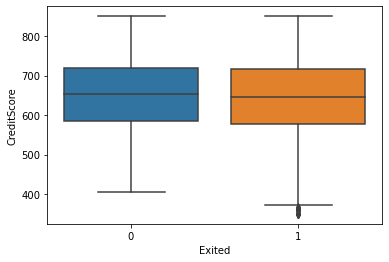

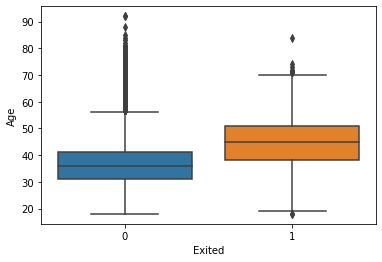

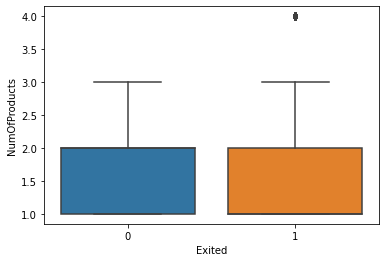

In [7]:
outlier_columns=['CreditScore','Age','NumOfProducts']

for col in outlier_columns:
    plt.figure()
    sns.boxplot(data=df,y=col,x='Exited')
    plt.show()

In [8]:
for exit in df['Exited'].unique():
    cs=df[df['Exited']==exit]['CreditScore']
    q1=np.quantile(cs,0.25)
    q3=np.quantile(cs,0.75)
    iqr=q3-q1
    uw=q3+0.5*iqr
    lw=q1-0.5*iqr
        
    index1=cs[cs>uw].index
    if len(index1)!=0:
        df.drop(index1,inplace=True)

    index2=cs[cs<lw].index
    if len(index2)!=0:
        df.drop(index2,inplace=True)

In [9]:
for exit in df['Exited'].unique():
    ages=df[df['Exited']==exit]['Age']
    q1=np.quantile(ages,0.25)
    q3=np.quantile(ages,0.75)
    iqr=q3-q1
    uw=q3+0.5*iqr
    lw=q1-0.5*iqr
        
    index1=ages[ages>uw].index
    if len(index1)!=0:
        df.drop(index1,inplace=True)

    index2=ages[ages<lw].index
    if len(index2)!=0:
        df.drop(index2,inplace=True)

In [10]:
for exit in df['Exited'].unique():
    nop=df[df['Exited']==exit]['NumOfProducts']
    q1=np.quantile(nop,0.25)
    q3=np.quantile(nop,0.75)
    iqr=q3-q1
    uw=q3+1.5*iqr
    lw=q1-1.5*iqr
        
    index1=nop[nop>uw].index
    if len(index1)!=0:
        df.drop(index1,inplace=True)

    index2=nop[nop<lw].index
    if len(index2)!=0:
        df.drop(index2,inplace=True)

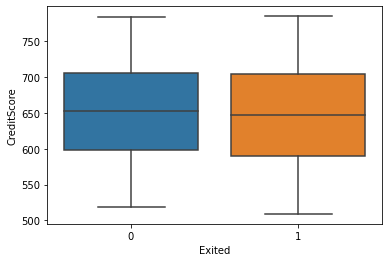

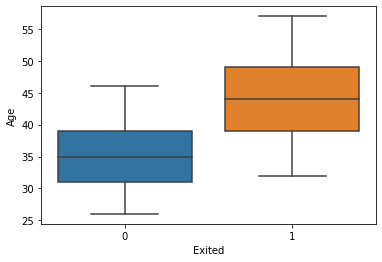

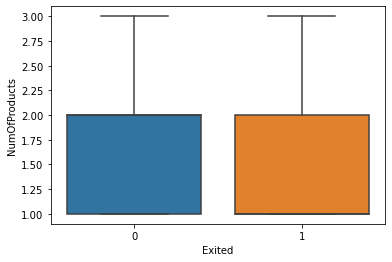

In [11]:
for col in outlier_columns:
    plt.figure()
    sns.boxplot(data=df,y=col,x='Exited')
    plt.show()

In [12]:
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

### plotting a countplot for performing EDA on categorical data.

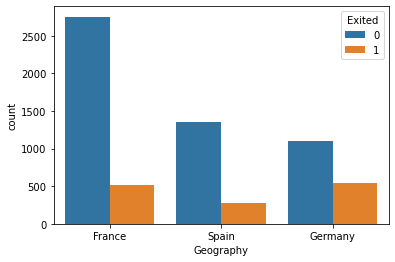

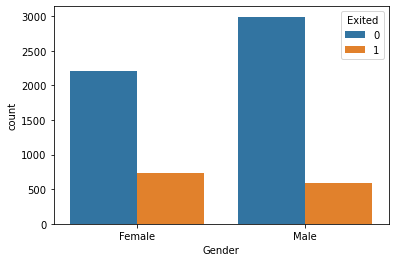

In [13]:
colum=['Geography','Gender']

for col in colum:
    plt.figure()
    sns.countplot(data=df,x=col,hue='Exited')
    plt.show()

### plotting a countplot for taget to see if the dataset is balanced or imbalance.

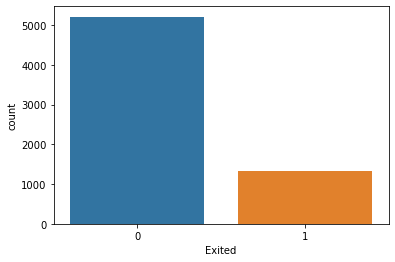

In [14]:
plt.figure()
sns.countplot(df['Exited'])
plt.show()

### so the dataset is highly imbalance.

### splitting the data into features and target.

In [15]:
X=df.drop(['RowNumber','Surname','Exited'],axis=1)
y=df['Exited']

In [16]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

### label encoding the categorical columns.

In [17]:
columns_=['Geography','Gender']

for col_ in columns_:
    le=LabelEncoder()
    X_train[col_]=le.fit_transform(X_train[col_])
    X_test[col_]=le.transform(X_test[col_])

### scaling the features(numerical features) using standard scaler.

In [18]:
scaling=['CustomerId','CreditScore','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary']

for col in scaling:
    ss=StandardScaler()
    X_train[col]=ss.fit_transform(X_train[[col]])
    X_test[col]=ss.transform(X_test[[col]])

### making the imbalance data balanced using Random Over Sampler

In [19]:
from imblearn.over_sampling import RandomOverSampler

In [20]:
rs = RandomOverSampler(random_state=1)
X_train_rs, y_train_rs = rs.fit_resample(X_train,y_train)

In [21]:
y_train_rs.value_counts()

1    3629
0    3629
Name: Exited, dtype: int64

## Naive Bayes Algorithm

In [22]:
from sklearn.naive_bayes import GaussianNB

#training data on training data
model = GaussianNB()

model.fit(X_train_rs,y_train_rs)

# predict on testing data

y_pred = model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.83      0.88      1579
           1       0.52      0.78      0.63       383

    accuracy                           0.82      1962
   macro avg       0.73      0.81      0.75      1962
weighted avg       0.86      0.82      0.83      1962



### Eplaination:-> Here we have created the model of GaussianNB and trained our model and this model has an acceptable value of the accuracy that is 82% and here the False Negative is critical so we should have an acceptably or high value of recall but as we see from the classification report the recall is 78% though it is not in the acceptable range of 80%-100% but still it is close to 80% so here it can solve the purpose.

## KNN (K-Nearest Neighbour)

In [23]:
from sklearn.neighbors import KNeighborsClassifier

neighbors = [3,5,7,9,11,13,15,17,19,21,23,25,27,29,31,33,35,37,39,41,43,45,47,49,85]

train_scores = []
test_scores = []

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_rs,y_train_rs)
    
    train_score = knn.score(X_train_rs,y_train_rs)#gives accuracy
    test_score = knn.score(X_test,y_test)#gives accuracy
    
    train_scores.append(train_score)#gives accuracy
    test_scores.append(test_score)#gives accuracy

### Explaination:-> Plotting a graph for/of training and testing score, for various value of the k(no. of nearest neighbour).

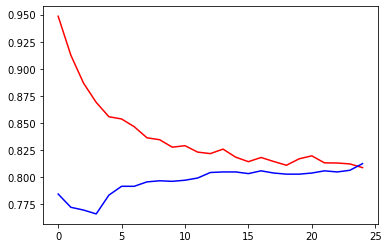

In [24]:
plt.figure()
plt.plot(train_scores, color="red")
plt.plot(test_scores, color="blue")
plt.show()

In [25]:
# Final model
knn = KNeighborsClassifier(n_neighbors=85)

knn.fit(X_train_rs,y_train_rs)

y_pred = knn.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.82      0.88      1579
           1       0.51      0.79      0.62       383

    accuracy                           0.81      1962
   macro avg       0.73      0.80      0.75      1962
weighted avg       0.86      0.81      0.83      1962



### Explaination: Here the applied algorithm is KNN and for this we have plot a graph for testing score and training score from where we extract the best value for k(no. of nearest neighbour). From the above graph we can see that best value for k is 85 where the testing score>training score, while for other values of k as shown above there exist a overfitting situation.With this our model gives us an accuracy of 81% which is satisfactory also a satisfactory recall of 79%.

## Logistic Regression

In [26]:
model1=LogisticRegression(random_state=1)
model1.fit(X_train_rs,y_train_rs)

LogisticRegression(random_state=1)

In [27]:
model1.score(X_train_rs,y_train_rs)

0.7587489666574814

In [28]:
y_pred=model1.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.78      0.85      1579
           1       0.46      0.77      0.58       383

    accuracy                           0.78      1962
   macro avg       0.70      0.78      0.71      1962
weighted avg       0.84      0.78      0.80      1962



In [29]:
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
print(tp,fp)
print(fn,tn)

296 350
87 1229


In [30]:
prob = model1.predict_proba(X_test)[:,-1]

thresholds = [0.5,0.4,0.3,0.2,0.1]
tprs = []
fprs = []

In [31]:
for th in thresholds:
    y_pred = np.where(prob >= th, 1, 0)
    tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
    
    tpr = tp/(tp + fn)
    fpr = fp/(fp + tn)
    
    tprs.append(tpr)
    fprs.append(fpr)

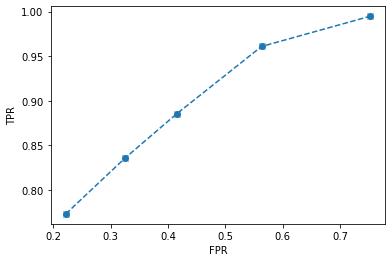

In [32]:
plt.figure()
plt.plot(fprs,tprs,"x--")
plt.scatter(fprs,tprs)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

In [33]:
# final model
y_pred = np.where(prob >= 0.2, 1, 0)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.44      0.60      1579
           1       0.29      0.96      0.45       383

    accuracy                           0.54      1962
   macro avg       0.64      0.70      0.53      1962
weighted avg       0.84      0.54      0.57      1962



In [34]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred)

0.698910471478627

### Explaination:-> Here in logistic regression with the help of graph b/w fpr vs tpr we find the best value for threshould and here in this case the best value is 0.2. Threshould=0.2 is selected because there is not that much improvement in tpr for threshould=0.1 also selecting 0.1 as threshould would significantly increase the fpr. Thus with this we get poor accuracy of 54% but a very good recall of 96% and area under the curve is 69.89%.   

## DecisionTree

In [35]:
model2=DecisionTreeClassifier()
model2.fit(X_train_rs,y_train_rs)

DecisionTreeClassifier()

In [36]:
model2.score(X_train_rs,y_train_rs)

1.0

In [37]:
y_pred=model2.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90      1579
           1       0.59      0.65      0.62       383

    accuracy                           0.84      1962
   macro avg       0.75      0.77      0.76      1962
weighted avg       0.85      0.84      0.85      1962



### Explaination:-> Here with all the default parameters value we get a accuracy of 84% and a poor recall of 64% also the training score is 100% due to which our model is overfitting situation. 

In [38]:
model2.get_depth()

22

## DecisionTree : max_depth

In [39]:
model3=DecisionTreeClassifier(max_depth=5)
model3.fit(X_train_rs,y_train_rs)

DecisionTreeClassifier(max_depth=5)

In [40]:
model3.score(X_train_rs,y_train_rs)

0.7980159823642877

In [41]:
y_pred=model3.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.78      0.86      1579
           1       0.48      0.83      0.61       383

    accuracy                           0.79      1962
   macro avg       0.71      0.81      0.73      1962
weighted avg       0.86      0.79      0.81      1962



### Explaination:-> On specifing the value of the max_depth=5 we get 79% accuracy for both testing and training and a good recall of 83% also this model is a best fit model.

## DecisionTree : min_samples_leaf

In [42]:
model4=DecisionTreeClassifier(min_samples_leaf=81)
model4.fit(X_train_rs,y_train_rs)

DecisionTreeClassifier(min_samples_leaf=81)

In [43]:
model4.score(X_train_rs,y_train_rs)

0.8350785340314136

In [44]:
y_pred=model4.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.83      0.89      1579
           1       0.54      0.80      0.64       383

    accuracy                           0.83      1962
   macro avg       0.74      0.82      0.76      1962
weighted avg       0.87      0.83      0.84      1962



### Explaination:-> On specifing the value of min_samples_leaf=81 we get an accuracy of 83% for both the training and testing and a good recall value of 80% thus this model is the best fit model.

## Random Forest

In [45]:
from sklearn.ensemble import RandomForestClassifier

In [46]:
rf = RandomForestClassifier(n_estimators=75, max_depth=5, max_features=8)
rf.fit(X_train_rs, y_train_rs)

RandomForestClassifier(max_depth=5, max_features=8, n_estimators=75)

In [47]:
rf.score(X_train_rs, y_train_rs)

0.8160650316891706

In [48]:
y_pred = rf.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.85      0.89      1579
           1       0.56      0.77      0.65       383

    accuracy                           0.84      1962
   macro avg       0.75      0.81      0.77      1962
weighted avg       0.86      0.84      0.85      1962



### Explaination:-> With n_estimators=75, max_depth=5, max_features=8 in random forest algorithm we get a testing accuracy of 84% and training accuracy of 81.37% and almost good value of recall = 76%. 

## AdaBoost

In [49]:
from sklearn.ensemble import AdaBoostClassifier

In [50]:
model7 = AdaBoostClassifier(n_estimators=100, random_state=1)
model7.fit(X_train_rs,y_train_rs)

AdaBoostClassifier(n_estimators=100, random_state=1)

In [51]:
# prediction
y_pred = model7.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.85      0.89      1579
           1       0.55      0.75      0.64       383

    accuracy                           0.83      1962
   macro avg       0.74      0.80      0.77      1962
weighted avg       0.86      0.83      0.84      1962



### Explaination:-> With n_estimators=100 our ada boost algo will have 100 such number of estimators at which boosting is terminated. In case of perfect fit, the learning procedure is stopped early.Thus our model gives an accuracy of 83% and recall of 75%.

## Gradient Boosting

In [52]:
from sklearn.ensemble import GradientBoostingClassifier

In [53]:
model8 = GradientBoostingClassifier(random_state=1, n_estimators=150, learning_rate=0.2)
model8.fit(X_train_rs,y_train_rs)

GradientBoostingClassifier(learning_rate=0.2, n_estimators=150, random_state=1)

In [54]:
y_pred = model8.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.88      0.91      1579
           1       0.60      0.74      0.66       383

    accuracy                           0.85      1962
   macro avg       0.77      0.81      0.79      1962
weighted avg       0.87      0.85      0.86      1962



### Explaination:-> In gradient boosting algorithm with random_state=1, n_estimators=150, learning_rate=0.2 we get an accuracy of 85% and a recall of 74%.Here Learning rate shrinks the contribution of each tree by learning_rate. There is a trade-off between learning_rate and n_estimators.

## XGboost 

In [55]:
from xgboost import XGBClassifier

xgb = XGBClassifier(n_estimators=200,random_state=1)

xgb.fit(X_train_rs,y_train_rs)

[18:27:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=200, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [56]:
y_pred = xgb.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.94      0.93      1579
           1       0.72      0.63      0.67       383

    accuracy                           0.88      1962
   macro avg       0.82      0.79      0.80      1962
weighted avg       0.88      0.88      0.88      1962



### Explaination:-> As we know that extreme gradient boosting algo is similar to the gradient boost algo but with additional features such as parallization,cache optimization,regularization etc. so this model gives us an accuracy of 88% and a recall value of 63%.

## SVM

In [57]:
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

lin_svc = LinearSVC(random_state=1)
lin_svc.fit(X_train_rs,y_train_rs)

LinearSVC(random_state=1)

In [58]:
y_pred = lin_svc.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.78      0.85      1579
           1       0.46      0.77      0.58       383

    accuracy                           0.78      1962
   macro avg       0.70      0.78      0.72      1962
weighted avg       0.84      0.78      0.80      1962



### Explaination:-> Here in SVM with C=1(no regularization) the accuracy is 78% and recall=77% so here there may be an issue of hard margin.To resolve this issue we have to convert hard margin to soft margin, which can be done with the help of C value whose default value is 1 and if we decrease the C value from 1 toward 0 then regularization will happen which in turn will convert hard margin to soft margin. 

## SVM : Soft Margin with C value

In [59]:
lin_svc_soft = LinearSVC(random_state=1, C=0.5)
lin_svc_soft.fit(X_train_rs,y_train_rs)

LinearSVC(C=0.5, random_state=1)

In [60]:
y_pred = lin_svc_soft.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.78      0.85      1579
           1       0.46      0.77      0.58       383

    accuracy                           0.78      1962
   macro avg       0.70      0.78      0.72      1962
weighted avg       0.84      0.78      0.80      1962



### Explaination:-> By mentioning the C value still we are getting the same result so here the issue is data is non-linearly seperable.So we now have to make use of kernel functions like polynomial kernel function,radial basis kernel function.

## SVM : Polynomial Kernel function

In [61]:
svc1 = SVC(kernel="poly", degree=3, random_state=1, C=0.5)
svc1.fit(X_train_rs,y_train_rs)

SVC(C=0.5, kernel='poly', random_state=1)

In [62]:
y_pred = svc1.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.86      0.89      1579
           1       0.56      0.74      0.64       383

    accuracy                           0.84      1962
   macro avg       0.75      0.80      0.77      1962
weighted avg       0.86      0.84      0.84      1962



### Explaination:-> In SVM polynomial kernel function with degree=3, random_state=1, C=0.5 we get an accuracy of 84% and recall of 74% which is best among other degree of plonomials.

## SVM : Radial Basis Kernel function

In [63]:
svc2 = SVC(kernel="rbf",random_state=1,C=0.1)
svc2.fit(X_train_rs,y_train_rs)

SVC(C=0.1, random_state=1)

In [64]:
y_pred = svc2.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.84      0.89      1579
           1       0.54      0.77      0.64       383

    accuracy                           0.83      1962
   macro avg       0.74      0.81      0.76      1962
weighted avg       0.86      0.83      0.84      1962



### Explaination:-> In radial basis kernel function with random_state=1,C=0.1 we get an accuracy of 83% and recall of 77%. Here the radial basis kernel functions have more recall value than polynomial kernel function and accuracy of both the kernel functions are similar.So radial basis kernel function is best in comparison to the polynomial kernel function for this dataset.

## AutoML

In [65]:
from tpot import TPOTClassifier

In [66]:
model9 = TPOTClassifier(generations=5, random_state=1, max_time_mins=10)
model9.fit(X_train_rs,y_train_rs)

TPOTClassifier(generations=5, max_time_mins=10, random_state=1)

In [67]:
# train score
model9.score(X_train_rs,y_train_rs)

1.0

In [68]:
# test score
model9.score(X_test,y_test)

0.8878695208970439

In [69]:
model9.fitted_pipeline_

Pipeline(steps=[('stackingestimator-1',
                 StackingEstimator(estimator=MLPClassifier(alpha=0.1,
                                                           learning_rate_init=1.0,
                                                           random_state=1))),
                ('stackingestimator-2',
                 StackingEstimator(estimator=GradientBoostingClassifier(learning_rate=0.5,
                                                                        max_depth=9,
                                                                        max_features=0.9000000000000001,
                                                                        min_samples_leaf=2,
                                                                        min_samples_split=7,
                                                                        random_state=1,
                                                                        subsample=0.900000000000...
                               gamm

### Explaination:-> As we know that in auto ml the processes that are automated are preprocessing,feature engineering,modelling and tunning and evaluation so it automatically gives us the best fitted pipe line.So through AutoML we get an accuracy of 100% in training and 88.78% accuracy of testing.So according to the value of parameters like generations,max_time_mins the TPOT will optimize the pipeline 